# Oversampling

By the end of this chapter you will be able to learn about another resampling technique, oversampling with some of it's extensions.

One of the ways to fight with the issues of imbalanced learning is to generate new samples in the classes, which are underrepresented. The most naive strategy is to create new samples by randomly sampling with replacement of the currently available samples.


Let's use the same credit card dataset for the illustration of oversampling (Random oversampling).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('creditcard.csv')
df.Class.value_counts()

0.0    98898
1.0      222
Name: Class, dtype: int64

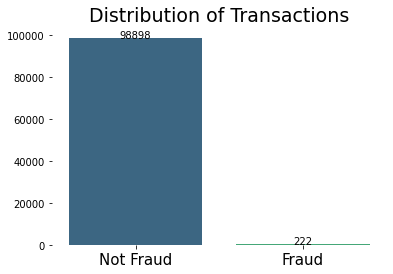

In [ ]:
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])


# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=19)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)


In [ ]:
X = pd.concat([X, y], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38632,39473,-0.367265,1.003264,1.058041,0.634395,0.478383,0.133001,0.542855,0.162472,-0.278744,-0.057422,-1.140486,-0.898883,-0.999888,0.466827,1.528735,-0.304064,-0.130449,0.122280,0.286039,0.067017,0.109312,0.471196,-0.252427,-0.664045,-0.097668,-0.185811,0.415347,0.200582,5.90,0.0
47905,43409,-1.691728,-1.621100,0.641290,-2.690706,-1.849708,-0.974309,0.594209,0.271848,-0.027033,-1.518221,-1.153751,-0.092356,-0.458316,0.210699,0.244318,-1.708103,0.154639,1.572906,-0.747027,0.245026,0.022969,-0.312588,0.767806,0.343325,-0.113248,-0.231492,-0.086751,0.002726,358.30,0.0
70751,54001,-1.869899,-0.401754,1.506120,-0.121822,1.205160,-1.740027,0.376592,-0.097288,-0.325536,-0.824835,-0.365298,-0.195884,-0.175036,-0.415398,0.513039,0.717365,-0.304062,-0.146657,-0.759373,-0.190122,-0.236899,-0.680860,0.743500,0.303036,0.120165,-0.045695,-0.041088,0.124162,1.29,0.0
86662,61342,-0.659883,0.958209,0.924674,0.956823,-0.153232,0.664856,-0.446185,0.733530,-0.456112,0.069876,1.423374,0.961256,0.159049,0.610445,1.169320,-0.388365,0.163111,0.141162,0.000807,-0.220236,0.536499,1.482456,0.083840,-0.254299,-1.356347,-0.342630,-0.033175,0.148644,2.37,0.0
48754,43773,0.780559,-0.610152,1.104996,1.712299,-0.755186,0.973725,-0.437642,0.377361,0.927653,-0.318997,0.647050,1.847792,-0.006091,-0.579812,-2.423487,-0.947803,0.509033,-0.870863,0.419865,0.092578,-0.279710,-0.649971,-0.049601,0.028305,0.357764,-0.541674,0.064602,0.042238,143.39,0.0


In [ ]:
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [ ]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1.0    74166
0.0    74166
Name: Class, dtype: int64

When we randomly replicate/duplicate instances in the dataset, the learned model might fit the training data too closely and as a result not generalise well to the unseen data.In order to get rid of this issue, a method of generating synthetic instances instead of merely copying existing instances in the dataset. This is *Synthetic Minority Over-Sampling Technique*, SMOTE.

__Note__ : You should always split into “test” and “train” sets before trying oversampling techniques. Oversampling before splitting the data can allow the exact same observations to be present in both the “test” and “train” sets. In addition, as the positive labels are duplicated many times, it is very common to have the model overfit the training data when using random oversampling.

__Merits of Oversampling__

- Unlike downsampling, oversampling methods leads to no information loss since it doesn't discard any samples.

- It performs relatively better than undersampling.

__Demerits of Overrsampling__
- Likelihood of overfitting is increased since it replicates/duplicates the minority class samples.

## SMOTE


Synthetic Minority Oversampling Technique, SMOTE is one of the most widely used approaches to synthesize new examples. It works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point along that line.

SMOTE first selects a minority class example, `a` at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors `b` at random and connecting `a` and `b` to form a line segment in the feature space. The synthetic instances are generated as a convex combination of both instances `a` and `b`.
We can refer to this as a type of data augmentation, which has proved to be a very effective one for tabular data.


<center>
<!-- <img src = 'https://drive.google.com/uc?export=view&id=10hCt5ipM8zMeo94OjraoXqkegIai-2xU'height ="300" width="650"/> -->

<img src = 'https://i.postimg.cc/GtZ7yDBr/image.png' height="300" width="650"/>
</center>

However, the algorithm has some weaknesses dealing with imbalance and noise.
One such drawback stems from the fact that SMOTE randomly chooses a minority instance to oversample
with uniform probability. While this allows the method to effectively combat between-class imbalance,
the issues of within-class imbalance and small disjuncts are ignored. Input areas counting many minority
samples have a high probability of being inflated further, while sparsely populated minority areas are
likely to remain sparse.


Another major concern is that SMOTE may further amplify noise present in the data. This is likely
to happen when linearly interpolating a noisy minority sample, which is located among majority class
instances, and its nearest minority neighbor. The method is susceptible to noise generation.



__Merits of SMOTE__

- It reduces the problem of overfitting as synthetic samples are generate rather than duplication.

- No loss of important information.

__Demerits of SMOTE__

- Overlapping of classes increases which leads to additional noise since SMOTE doesn't consider neighbouring examples from other classes.

- It does't work well with high dimensional data.

There are several hybrid techniques that have been developed by combining oversampling and undersampling such as:

> SMOTE + Tomek


>SMOTE + ENN

Although over sampling class examples balance class distributions, some other problems usually present in data sets with skewed class distributions are not solved. Class clusters are not well defined since some majority class examples might be invading the minority class space. The opposite can also be true, since interpolating minority class examples can expand the minority class clusters. If we induce a classifier under such a situation can lead to overfitting. So we propose applying Tomek links to the over sampled training set as a data cleaning method.

Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

Instead of avoiding only the majority class examples or minority class examples from Tomek links, examples from both classes can also be removed removed.
Here, minority class examples that participate of a Tomek link are removed.
We can see the application in the figure below. *Fig a* is the original dataset, *Fig b* is oversampling with SMOTE. *Fig c* depicts the identification of Tomek links whereas *Fig d* is producing a balanced dataset with well defined class clusters. So,  this is SMOTE +Tomek.



Next we have SMOTE +ENN which is similar to SMOTE+Tomek links. ENN tends to remove more examples that it will provide a more in depth data cleaning.


<!-- ![alt text](https://drive.google.com/uc?export=view&id=1YxRByMVomWCPmfPftd7_bZKnIzNuSPXy) -->
![alt text](https://i.postimg.cc/K8JFXSML/image.png)


You will see the use of these techniques in a ML model and how it actually alters the performance with different evaluation metrics in **Chapter 6:Imbalance-Learn**.

## Key Takeaways
Here in this chapter, we came across the oversampling technique to resolve the challenges that come with imbalanced data.

Also, there is a synthetic Minority oversampling technique that avoids the overfitting problem created by naive oversampling. By SMOTE, redundant instances are reduced, and better performance is achieved.  There are two improvements in SMOTE, i.e., SMOTE + Tomek and SMOTE + ENN.

You can also define a sequence of oversampling and undersampling methods to be applied to imbalanced dataset or when evaluating a classifier model. You can manually combine different oversampling and undersampling techniques to get better performance of the model.

Learn more about this combination of the resampling techniques [here.](https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/)
